In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
# breast_cancer = pd.DataFrame(breast_cancer.data)

In [3]:
breast_cancer = pd.read_csv("C:/Users/BDA/Downloads/Breast_Cancer.csv",header = None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
len(breast_cancer)-breast_cancer.count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64

In [5]:
x = breast_cancer.iloc[:,:2]
y = breast_cancer.iloc[:,-1]

x = np.array(x)
y = np.array(y)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Splitting the data to train & test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [7]:
logReg = LogisticRegression(C=1e5,solver='lbfgs', multi_class='multinomial')

In [8]:
logReg.fit(xTrain,yTrain)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [9]:
logReg.score(xTest,yTest)

0.9122807017543859

In [10]:
yPred = logReg.predict(xTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(xTest, yTest)))

Accuracy of logistic regression classifier on test set: 0.91


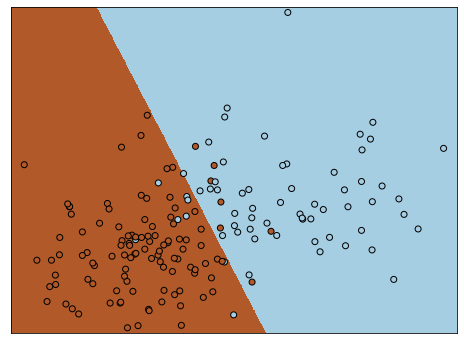

In [11]:
# Plotting the predicted class
x_min, x_max = xTest[:, 0].min() - .5, xTest[:, 0].max() + .5
y_min, y_max = xTest[:, 1].min() - .5, xTest[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logReg.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(xTest[:, 0], xTest[:, 1], c=yTest, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()